In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from scipy import stats
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import grangercausalitytests
import pickle

import cdt
import networkx as nx

/home/apoletaev/miniconda3/envs/test1/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Detecting 1 CUDA device(s).


In [8]:
import cdt
from cdt import SETTINGS
SETTINGS.verbose=False
SETTINGS.NJOBS=16
import networkx as nx
import time
# A warning on R libraries might occur. It is for the use of the r libraries that could be imported into the framework
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt



In [ ]:
!!! install.packages("RCIT")

In [9]:
df = pd.read_csv("./df_aaple.csv")
df = df.iloc[:100,1:5]
df

,Close,Adj. Close,P/E (LTM),EPS - Est High (NTM)
0,27.905,17.580627,35.994469,1.08
1,27.960,17.615278,36.065413,1.08
2,28.195,17.763332,36.368538,1.08
3,28.485,17.946037,36.742607,1.08
4,28.135,17.725531,36.291144,1.08
...,...,...,...,...
95,24.410,15.428166,35.936536,1.33
96,24.400,15.421846,35.921814,1.33
97,24.610,15.554575,36.230977,1.33
98,24.639,15.572904,36.273671,1.33


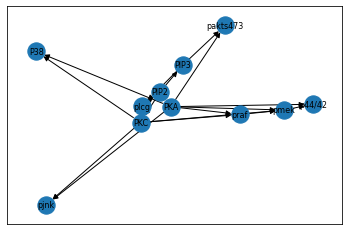

,praf,pmek,plcg,PIP2,PIP3,p44/42,pakts473,PKA,PKC,P38,pjnk
0,26.4,13.2,8.82,18.30,58.80,6.61,17.0,414.0,17.00,44.9,40.0
1,35.9,16.5,12.30,16.80,8.13,18.60,32.5,352.0,3.37,16.5,61.5
2,59.4,44.1,14.60,10.20,13.00,14.90,32.5,403.0,11.40,31.9,19.5
3,73.0,82.8,23.10,13.50,1.29,5.83,11.8,528.0,13.70,28.6,23.1
4,33.7,19.8,5.19,9.73,24.80,21.10,46.1,305.0,4.66,25.7,81.3


In [23]:


# Load data and graph solution
data, solution = cdt.data.load_dataset('sachs')
nx.draw_networkx(solution, font_size=8) # The plot function allows for quick visualization of the graph. 
plt.show()
data.head()



--- Execution time : 3.63 seconds ---


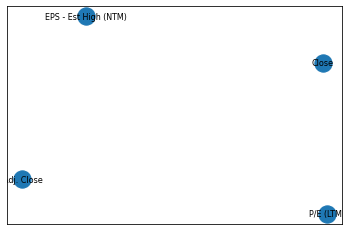

""


In [13]:
from cdt.independence.graph import FSGNN

Fsgnn = FSGNN(train_epochs=1000, test_epochs=500, l1=0.1, batch_size=1000)

start_time = time.time()
ugraph = Fsgnn.predict(df, threshold=1e-7)
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))
nx.draw_networkx(ugraph, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show()
# List results
pd.DataFrame(list(ugraph.edges(data='weight')))

In [2]:
df_aapl = pd.read_csv("df_aaple.csv")
df_small = df_aapl.iloc[:,:4]
df_small.drop(columns="Adj. Close", inplace=True)
df_small["P/E"] = df_small["P/E (LTM)"]
df_small.drop(columns="P/E (LTM)", inplace=True)
df_small["# Buys"] = df_aapl["# Buys"]
df = df_small.iloc[:,1:]

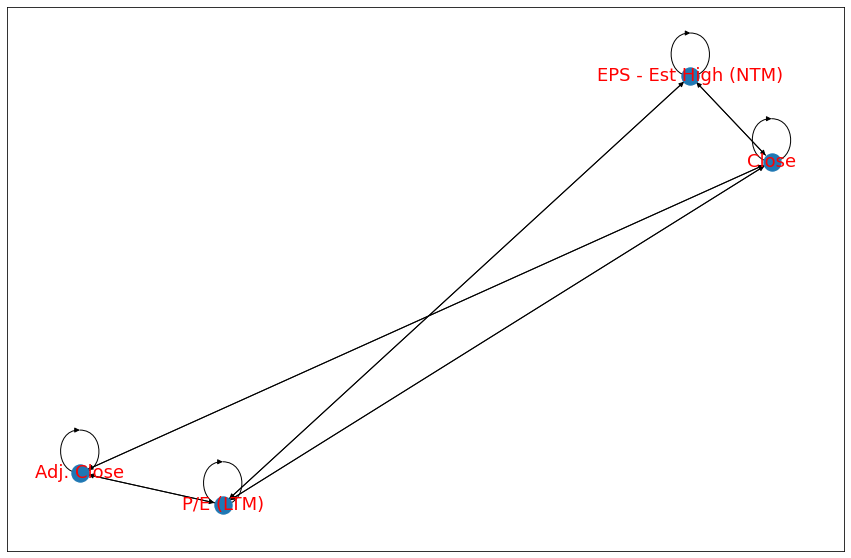

In [24]:
# Get skeleton graph
# initialize graph lasso
glasso = cdt.independence.graph.Glasso()
# apply graph lasso to data
skeleton = glasso.predict(df)
# visualize network
fig = plt.figure(figsize=(15,10))
nx.draw_networkx(skeleton, font_size=18, font_color='r')

In [3]:
cdt.SETTINGS.rpath = '/usr/bin/R' # path to your r executable


In [ ]:
install.packages(c("pcalg", "kpcalg", "bnlearn", "sparsebn", "SID", "CAM", "D2C", "RCIT"))xx

In [26]:
from cdt.causality.graph import PC

In [27]:
# Use causal discovery to get causal models# PC algorithm
model_pc = PC()
# graph_pc = model_pc.predict(df, skeleton)

# # visualize network
# fig=plt.figure(figsize=(15,10))
# nx.draw_networkx(graph_pc, font_size=18, font_color='r')

KeyboardInterrupt: 

In [18]:
# GES algorithm
model_ges = cdt.causality.graph.GES()
graph_ges = model_ges.predict(df, skeleton)

# # visualize network
# fig=plt.figure(figsize=(15,10))
# nx.draw_networkx(graph_ges, font_size=18, font_color='r')

KeyboardInterrupt: 

In [ ]:
# test change